In [61]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#constants
DATA_PATH = os.path.join(os.getcwd(),"..", "data", "raw", "churn-data.csv")

In [63]:
df = pd.read_csv(DATA_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
# Dropping unnecessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [65]:
df.columns=df.columns.str.replace(' ','_').str.replace('(','').str.replace(')','')

In [66]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [67]:
# Basic information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##  Data Quality Issues

### 1. **Salary Anomaly** 
- **Minimum estimated salary: $11.58** - This appears unrealistic for employed banking customers
- **Possible issues**: Data entry error, placeholder values, or test records
- **Impact**: Could skew salary-based analysis and models

### 2. **Balance Distribution** 
- **25th percentile balance: $0** - Significant portion with zero balance
- **Median balance: $97,198** vs **Mean: $76,485** - Left-skewed distribution
- **Implication**: Two distinct customer segments (zero vs substantial balances)

### 3. **Age Outlier** 
- **Maximum age: 92 years** - Unusually high for active banking customers
- **Consider**: Data validation needed for extreme age values

### 4. **Active Member Representation** 
- **isactivemember** shows 51.5% active participation

In [68]:
print(f"Dataset shape: {df.shape}")
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Dataset shape: (10000, 11)
Number of duplicated rows: 0


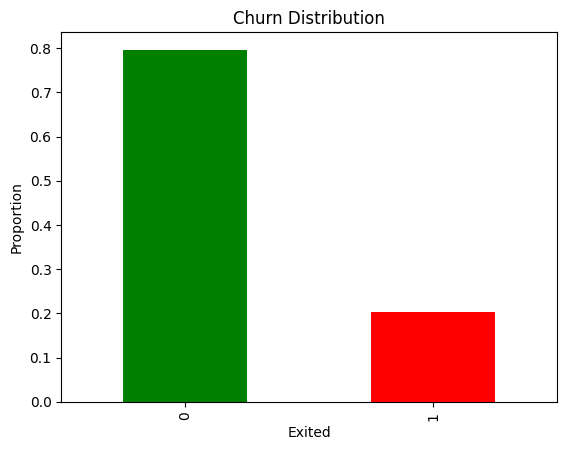

In [69]:
df['Exited'].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Proportion')
plt.show()

- **Class imbalance**: 79.6% retained vs 20.4% exited

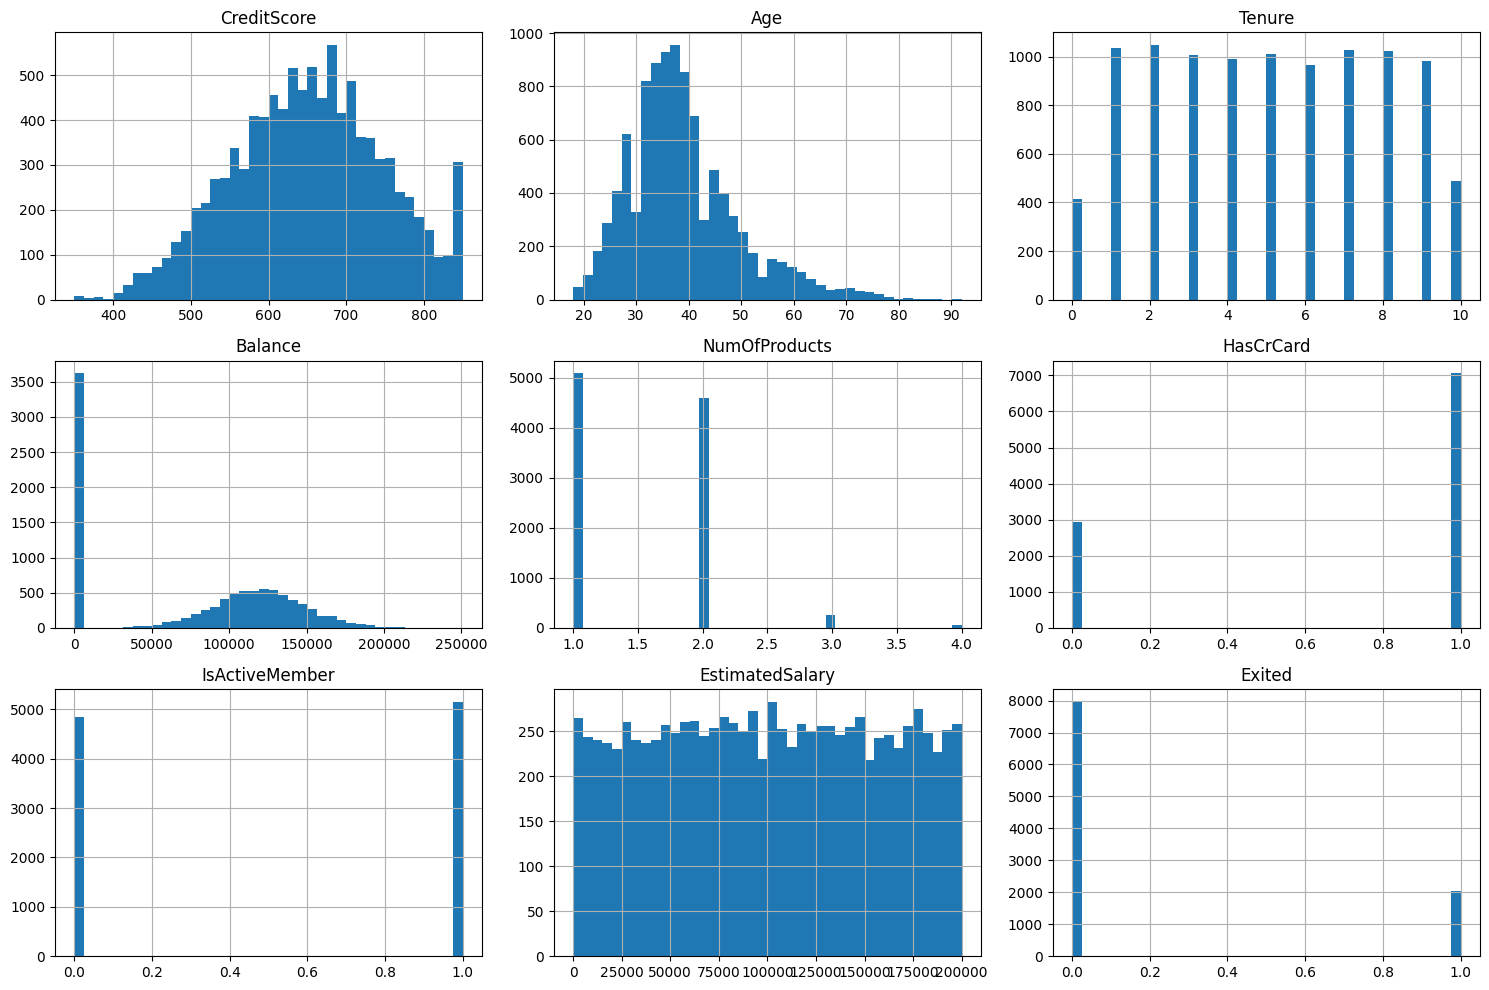

In [70]:
df.hist(bins=40, figsize=(15,10))
plt.tight_layout()
plt.show()

<Axes: ylabel='CreditScore'>

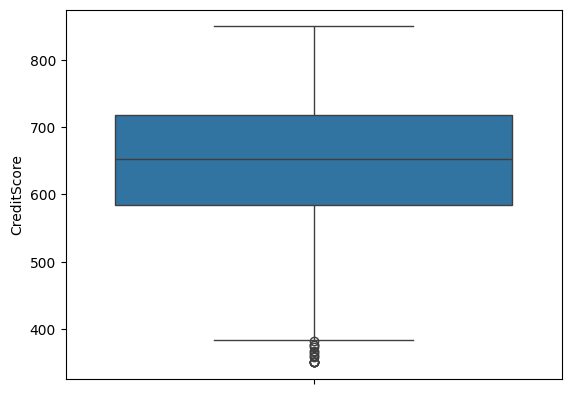

In [81]:
sns.boxplot(data=df, y='CreditScore')

<Axes: ylabel='EstimatedSalary'>

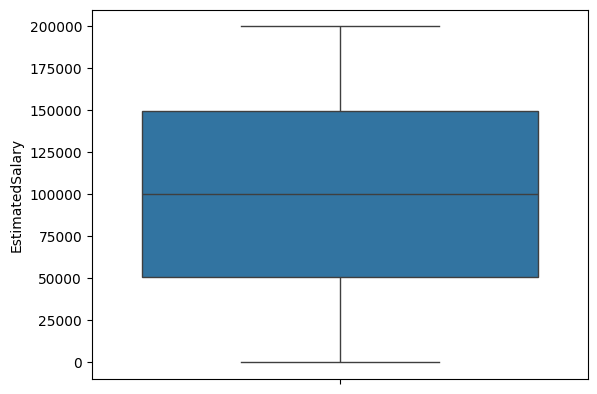

In [80]:
sns.boxplot(data=df, y='EstimatedSalary')


1. **Which geography shows the highest churn (Exited = 1)?**
2. **Does churn differ significantly between males and females within each geography?**
3. **In which geography is the gender gap the largest for customers who exited?**
4. **Are male or female customers generally more likely to exit across all geographies?**

---

5. **Which age group has the highest number of active members?**
6. **Are inactive members concentrated in specific age ranges?**
7. **Do younger customers tend to be more or less active than older customers?**

---

8. **Are there any features highly correlated with each other ?**
9. **Do financial variables like CreditScore, Balance, or EstimatedSalary correlate meaningfully with churn?**

---


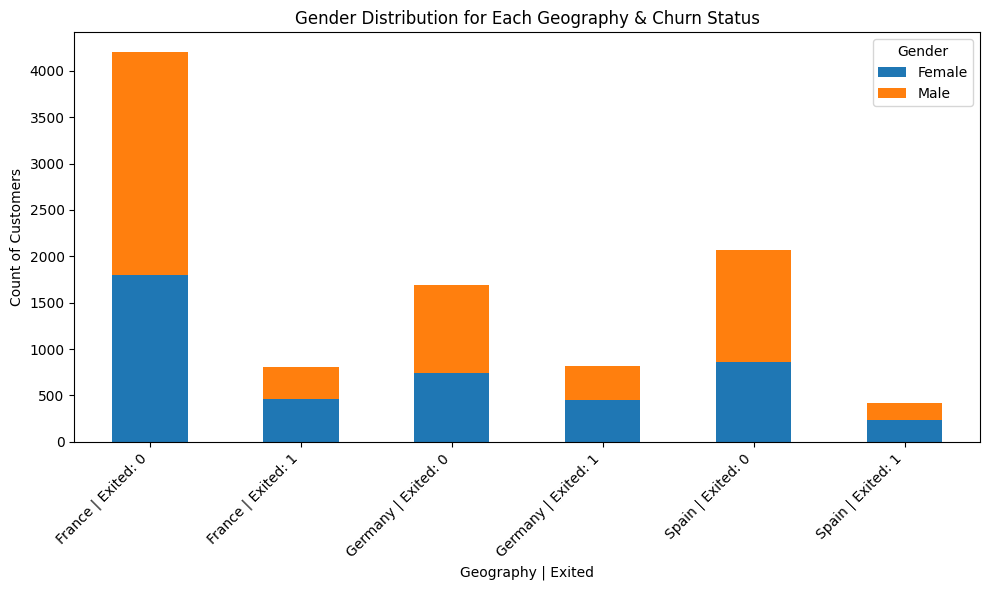

In [71]:
# Create combined label
df['Geo_Exited_Label'] = df['Geography'] + ' | Exited: ' + df['Exited'].astype(str)

# Create crosstab (pivot table) for stacked bar plot
stacked_data = pd.crosstab(df['Geo_Exited_Label'], df['Gender'])

# Sort labels (Geo then Exited)
stacked_data = stacked_data.sort_index()

# Plot
plt.figure(figsize=(10, 6))
stacked_data.plot(
    kind='bar',
    stacked=True,
    ax=plt.gca()
)

plt.title('Gender Distribution for Each Geography & Churn Status')
plt.xlabel('Geography | Exited')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
df.drop(columns=['Geo_Exited_Label'], inplace=True)

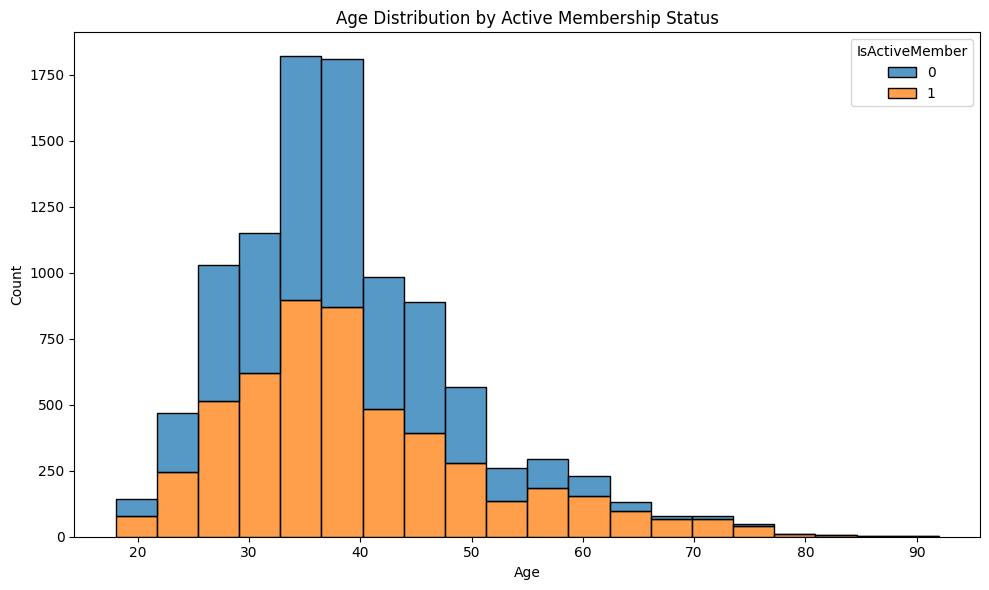

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='IsActiveMember', multiple='stack', bins=20,common_bins=True)
plt.title('Age Distribution by Active Membership Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


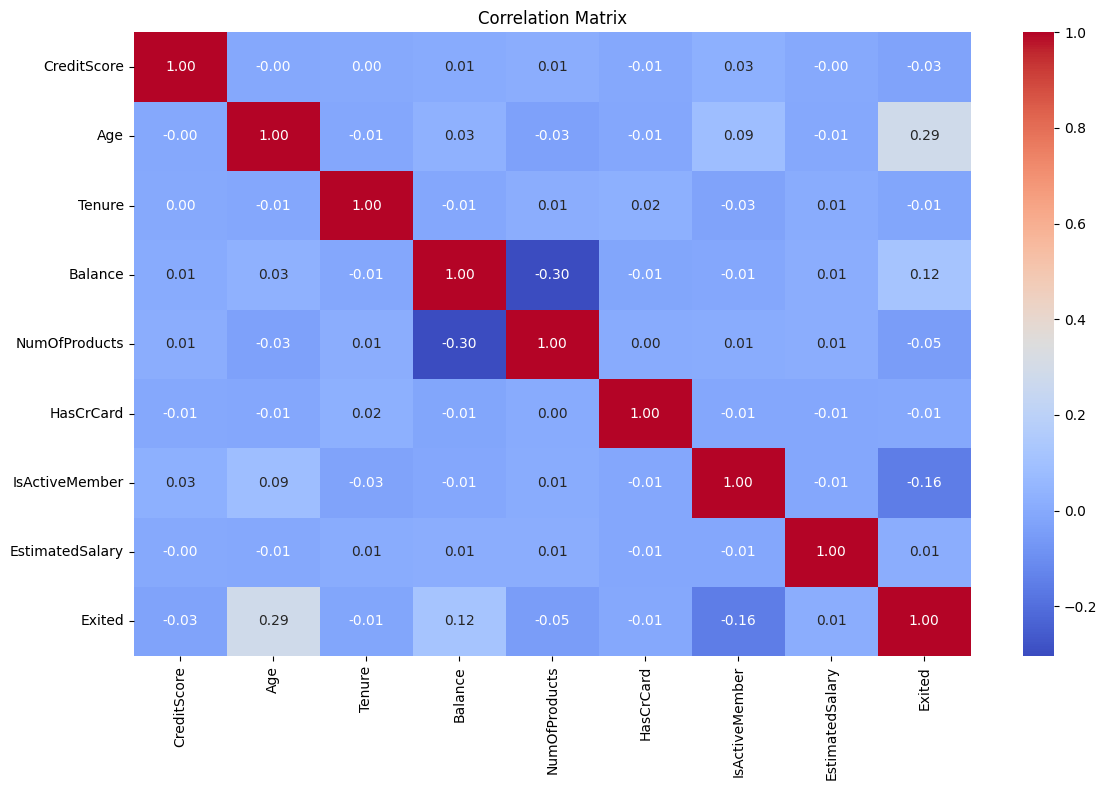

In [ ]:
# Correlation matrix to identify relationships between numerical features
plt.figure(figsize=(12,8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

--------------------

---

# 🛠️ Preprocessing Pipeline —  Notes

## **1. Handle Class Imbalance**

* The target variable **Exited** is imbalanced (≈79.6% stayed vs. 20.4% exited).

### **Recommended Actions**

* Apply **SMOTE** (Synthetic Minority Oversampling Technique) or use **class weights** during model training.
* Always use a **Stratified train–test split** to preserve the same target ratio in both sets.

---

## **2. Balance Feature — Zero Spike Investigation**

* A large number of customers have a **Balance of zero**, which may indicate:

  * A real behavioral pattern, **or**
  * Missing values encoded as 0.

### **Recommended Actions**

* Investigate whether **0 = missing** and impute if necessary.
* Create a binary feature to capture this behavior:

  ```python
  df['BalanceIsZero'] = df['Balance'] == 0
  ```

---

## **3. Age Feature — Skewness & Outliers**

* The age distribution is **right-skewed**, with most customers between **30–45**.
* There are rare or extreme ages above **70–90**, which may act as outliers.

### **Recommended Actions**

* Apply a **log transform** or **Box–Cox** (for models sensitive to skewness).
* Create **age bins** to capture meaningful groups, e.g.:

  * Young (18–30)
  * Adult (30–45)
  * Senior (45–60)
  * Elderly (60+)
---